PRELIMINARY STEP: import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings in order to get rid of them

In [2]:
import warnings
warnings.filterwarnings("ignore")

Reading the dataset thanks to the built-in function in pandas.

In [3]:
ds = pd.read_csv("./credit_prediction.csv")  #open and read the file using pandas

In [4]:
ds.head(10) #show the first 10 elements

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,23.0,Scientist,19114.12,1824.843333,NaN,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,Good,809.98,31.377862,268.0,No,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,23.0,NaN,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,27.262259,270.0,No,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,271.0,No,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,7,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,23.933795,NaN,No,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,8,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,NaN,Credit-Builder Loan,...,2.0,Good,605.03,NaN,319.0,NaN,NaN,Low_spent_Small_value_payments,470.690627,Standard
9,9,28.0,Teacher,34847.84,3037.986667,NaN,4.0,6.0,1.0,Credit-Builder Loan,...,2.0,Good,605.03,38.550848,320.0,No,40.391238,High_spent_Large_value_payments,484.591214,Good


In [6]:
ds.duplicated().sum() #let's see how many duplicates

0

<AxesSubplot:>

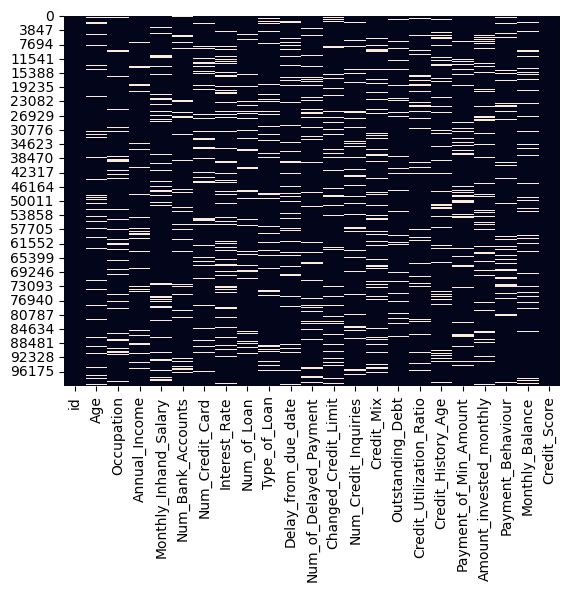

In [7]:
sns.heatmap(ds.isna(), cbar = False) #to visualize null values for each column

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

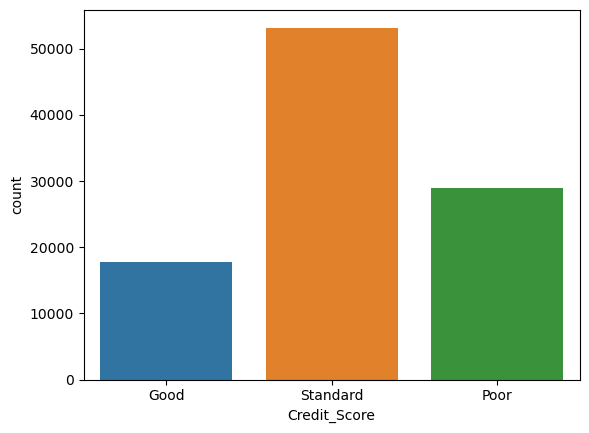

In [8]:
sns.countplot(x = ds['Credit_Score']) #to visualize how many of them

In [9]:
freq = ds.groupby(['Credit_Score']).count()
print(freq) #in order to calculate the baseline

                 id    Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
Credit_Score                                                                   
Good          17828  16097       16013          16025                  15924   
Poor          28998  26169       26044          26056                  26145   
Standard      53174  47847       47897          47730                  47812   

              Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Credit_Score                                                                   
Good                      16125            16075          16050        16052   
Poor                      26047            26103          26081        26138   
Standard                  47763            47953          47868        47840   

              Type_of_Loan  ...  Changed_Credit_Limit  Num_Credit_Inquiries  \
Credit_Score                ...                                               
Good                 16056  ...         

In order to visualize the trend of some variables we should plot them, using an histogram.

<AxesSubplot:ylabel='Frequency'>

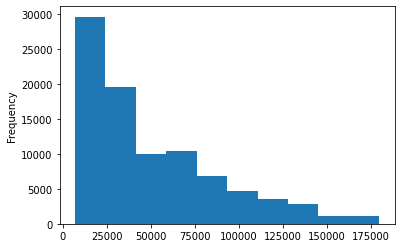

In [4]:
ds['Annual_Income'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

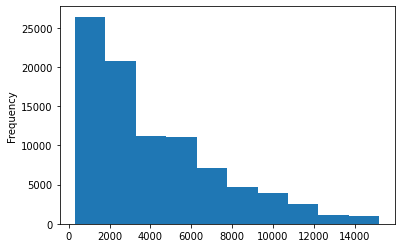

In [6]:
ds['Monthly_Inhand_Salary'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

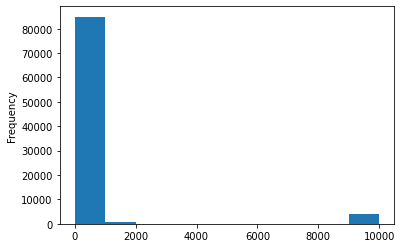

In [7]:
ds['Amount_invested_monthly'].plot(kind='hist')

We need to transform categorical variables into numerical ones.

In [5]:
#we can eliminate a priori the column 'id' as it is not needed
ds = ds.drop(columns=['id'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       90113 non-null   float64
 1   Occupation                89954 non-null   object 
 2   Annual_Income             89811 non-null   float64
 3   Monthly_Inhand_Salary     89881 non-null   float64
 4   Num_Bank_Accounts         89935 non-null   float64
 5   Num_Credit_Card           90131 non-null   float64
 6   Interest_Rate             89999 non-null   float64
 7   Num_of_Loan               90030 non-null   float64
 8   Type_of_Loan              89921 non-null   object 
 9   Delay_from_due_date       90053 non-null   float64
 10  Num_of_Delayed_Payment    89927 non-null   float64
 11  Changed_Credit_Limit      90077 non-null   float64
 12  Num_Credit_Inquiries      89971 non-null   float64
 13  Credit_Mix                89895 non-null   ob

In [6]:
from sklearn.preprocessing import LabelEncoder
ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])
ds['Occupation'] = LabelEncoder().fit_transform(ds['Occupation'])
ds['Type_of_Loan'] = LabelEncoder().fit_transform(ds['Type_of_Loan'])
ds['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(ds['Payment_of_Min_Amount'])

In [7]:
ds.corr() #to see correlations, but all categorical ones will be ignored, so change them

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Age,1.000000,0.000250,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,0.010223,-0.175110,...,-0.158929,-0.251603,0.060897,-0.202975,0.023721,0.235896,-0.124852,0.006597,-0.030798,-0.002635
Occupation,0.000250,1.000000,0.000648,0.001313,0.009864,0.004693,0.003234,-0.004587,-0.005364,0.007855,...,-0.001963,0.001500,0.002422,0.004877,-0.002016,-0.006510,-0.002216,0.003266,0.004240,0.000573
Annual_Income,0.094214,0.000648,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,0.014369,-0.249761,...,-0.177471,-0.280632,0.078006,-0.269997,0.177065,0.272721,-0.150307,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,0.092432,0.001313,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,0.018436,-0.249382,...,-0.175202,-0.279105,0.077388,-0.269707,0.178518,0.271030,-0.151819,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,-0.192405,0.009864,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,-0.012213,0.560583,...,0.333300,0.515379,-0.184559,0.506999,-0.070942,-0.485478,0.280019,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.147670,0.004693,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,-0.008954,0.479751,...,0.253572,0.458086,-0.263867,0.491157,-0.055238,-0.416870,0.199322,-0.010274,0.063975,0.004964
Interest_Rate,-0.218744,0.003234,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,-0.013564,0.591529,...,0.370325,0.631691,-0.259463,0.628982,-0.077353,-0.576643,0.297324,-0.018500,0.090950,0.004477
Num_of_Loan,-0.215283,-0.004587,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,-0.028766,0.503398,...,0.374885,0.564533,-0.351639,0.639486,-0.101013,-0.606878,0.248270,-0.012386,0.077168,0.001958
Type_of_Loan,0.010223,-0.005364,0.014369,0.018436,-0.012213,-0.008954,-0.013564,-0.028766,1.000000,-0.018956,...,-0.016538,-0.004203,0.005605,-0.016616,0.005935,0.011068,-0.006912,-0.001155,-0.001686,-0.002888
Delay_from_due_date,-0.175110,0.007855,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,-0.018956,1.000000,...,0.296495,0.539325,-0.326715,0.572768,-0.064390,-0.489846,0.243713,-0.009811,0.077015,0.004988


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       90113 non-null   float64
 1   Occupation                100000 non-null  int32  
 2   Annual_Income             89811 non-null   float64
 3   Monthly_Inhand_Salary     89881 non-null   float64
 4   Num_Bank_Accounts         89935 non-null   float64
 5   Num_Credit_Card           90131 non-null   float64
 6   Interest_Rate             89999 non-null   float64
 7   Num_of_Loan               90030 non-null   float64
 8   Type_of_Loan              100000 non-null  int32  
 9   Delay_from_due_date       90053 non-null   float64
 10  Num_of_Delayed_Payment    89927 non-null   float64
 11  Changed_Credit_Limit      90077 non-null   float64
 12  Num_Credit_Inquiries      89971 non-null   float64
 13  Credit_Mix                100000 non-null  in

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline=ColumnTransformer([('num',StandardScaler(),[0,2,3,4,5,6,7,9,10,11,12,14,15,16,18,20]),('cat',OneHotEncoder(handle_unknown='ignore'),[1,8,13,17,19])])



ds.head()
#again
ds.corr()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Age,1.000000,0.000250,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,0.010223,-0.175110,...,-0.158929,-0.251603,0.060897,-0.202975,0.023721,0.235896,-0.124852,0.006597,-0.030798,-0.002635
Occupation,0.000250,1.000000,0.000648,0.001313,0.009864,0.004693,0.003234,-0.004587,-0.005364,0.007855,...,-0.001963,0.001500,0.002422,0.004877,-0.002016,-0.006510,-0.002216,0.003266,0.004240,0.000573
Annual_Income,0.094214,0.000648,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,0.014369,-0.249761,...,-0.177471,-0.280632,0.078006,-0.269997,0.177065,0.272721,-0.150307,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,0.092432,0.001313,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,0.018436,-0.249382,...,-0.175202,-0.279105,0.077388,-0.269707,0.178518,0.271030,-0.151819,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,-0.192405,0.009864,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,-0.012213,0.560583,...,0.333300,0.515379,-0.184559,0.506999,-0.070942,-0.485478,0.280019,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.147670,0.004693,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,-0.008954,0.479751,...,0.253572,0.458086,-0.263867,0.491157,-0.055238,-0.416870,0.199322,-0.010274,0.063975,0.004964
Interest_Rate,-0.218744,0.003234,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,-0.013564,0.591529,...,0.370325,0.631691,-0.259463,0.628982,-0.077353,-0.576643,0.297324,-0.018500,0.090950,0.004477
Num_of_Loan,-0.215283,-0.004587,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,-0.028766,0.503398,...,0.374885,0.564533,-0.351639,0.639486,-0.101013,-0.606878,0.248270,-0.012386,0.077168,0.001958
Type_of_Loan,0.010223,-0.005364,0.014369,0.018436,-0.012213,-0.008954,-0.013564,-0.028766,1.000000,-0.018956,...,-0.016538,-0.004203,0.005605,-0.016616,0.005935,0.011068,-0.006912,-0.001155,-0.001686,-0.002888
Delay_from_due_date,-0.175110,0.007855,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,-0.018956,1.000000,...,0.296495,0.539325,-0.326715,0.572768,-0.064390,-0.489846,0.243713,-0.009811,0.077015,0.004988


In [ ]:
description = ds.describe() #statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In order to see the popularity of age

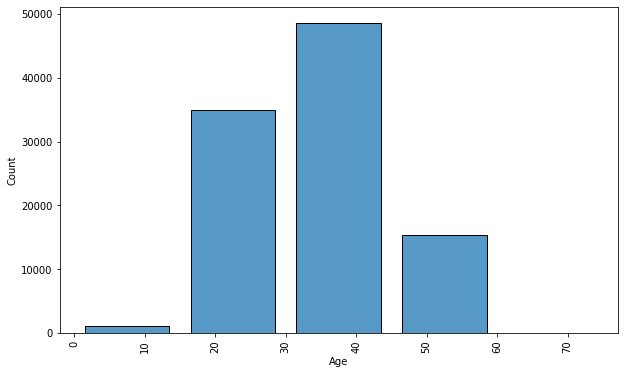

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(ds['Age'], bins=[0,15,30,45,60,75], shrink=.8)
plt.xticks(rotation=90);

Remove outliers

Outliers are points that are noticebly different from the others, this is why it is better to remove them.
We have decided to visualize them thanks to the boxplot, realized thanks to seaborn.

In [ ]:
from numpy import percentile

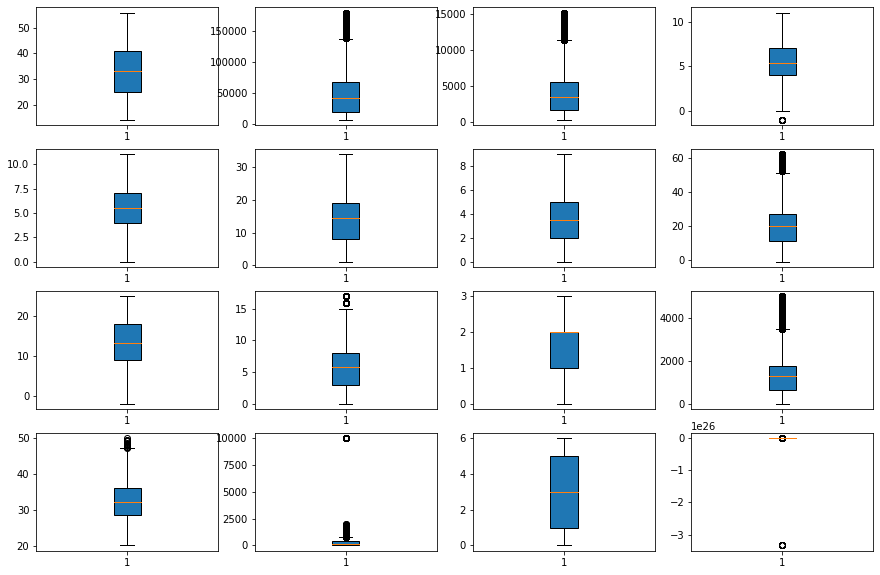

In [ ]:
fig, axs = plt.subplots(4,4)
fig.set_figwidth(15)
fig.set_figheight(10)

a = 0
b = 0 
for x in ds.columns:
  axs[b, a].boxplot(ds[x], patch_artist=True)
  if a == 3:
       a = 0
       b = b+1
  else:
      a = a+1
  if b == 4:
      break

Percentiles: 25th=25.000, 75th=41.000, IQR=16.000

The number of identified outliers for the variable Age is:
0
Percentiles: 25th=20347.965, 75th=67531.720, IQR=47183.755

The number of identified outliers for the variable Annual_Income is:
3138
Percentiles: 25th=1724.938, 75th=5582.571, IQR=3857.632

The number of identified outliers for the variable Monthly_Inhand_Salary is:
3371
Percentiles: 25th=4.000, 75th=7.000, IQR=3.000

The number of identified outliers for the variable Num_Bank_Accounts is:
19
Percentiles: 25th=4.000, 75th=7.000, IQR=3.000

The number of identified outliers for the variable Num_Credit_Card is:
0
Percentiles: 25th=8.000, 75th=19.000, IQR=11.000

The number of identified outliers for the variable Interest_Rate is:
0
Percentiles: 25th=2.000, 75th=5.000, IQR=3.000

The number of identified outliers for the variable Num_of_Loan is:
0
Percentiles: 25th=11.000, 75th=27.000, IQR=16.000

The number of identified outliers for the variable Delay_from_due_date is:
5755
P

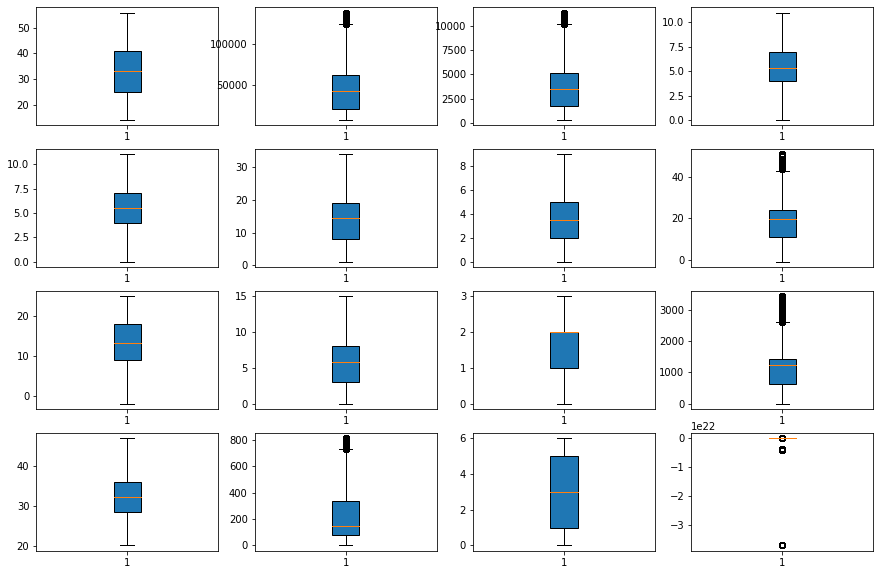

In [ ]:
fig, axs = plt.subplots(4,4)
fig.set_figwidth(15)
fig.set_figheight(10)

a = 0
b = 0 
for x in ds.columns:
    #a = sns.boxplot(ds[x])
    q25, q75 = percentile(ds[x], 25), percentile(ds[x], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [j for j in ds[x] if j < lower or j > upper]
    print('\nThe number of identified outliers for the variable', x ,'is:\n' '%d' % len(outliers))

    if len(outliers) != 0:
        for i in outliers:
            ds[x] = ds[x].replace(i,ds[x].mean())
# using the variable axs for multiple Axes
    axs[b, a].boxplot(ds[x], patch_artist=True)
    if a == 3:
        a = 0
        b = b+1
    else:
        a = a+1
    if b == 4:
        break

After having looked at our dataset and having cleaned it, we can now start collecting data into array of dependent (what we want to predict) and independent variables  

In [28]:
#collect data into arrays
X = ds.iloc[:, :-1].values      #independent variable
y = ds.iloc[:, -1].values       #dependent variable

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
#encode data. This step is really important, we have already transformed the categorical data into integers. REMEMBER, NEVER TRAIN ON THE TEST SET!!

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In order not to let the 'test' variables how we fill the null values, we should divide in train and test set before.

In [31]:
#replace missing values with the mode if they are categorical variables and th mean for the numerical ones

for i in ds.columns[:-1]:
    
    if i == 'Credit_Mix' or i == 'Payment_Behaviour' or i == 'Occupation' or i == 'Type_of_Loan' or i == 'Payment_of_Min_Amount':
        ds[i].fillna(ds[i].mode(), inplace = True)
    else:
        ds[i].fillna(ds[i].mean(), inplace = True)
        
ds.isnull().sum() #check how many null values in ds now
ds.info() #contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  int32  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

We can now decide three models that can help us solving this problem. 

In [ ]:
from sklearn.svm import SVC 
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score

Kernel SVC classifier

{'C': 0.1, 'kernel': 'rbf', 'max_iter': 5000}
              precision    recall  f1-score   support

        Good       0.39      0.08      0.13      4428
        Poor       0.58      0.31      0.40      7277
    Standard       0.57      0.87      0.69     13295

    accuracy                           0.56     25000
   macro avg       0.51      0.42      0.41     25000
weighted avg       0.54      0.56      0.51     25000



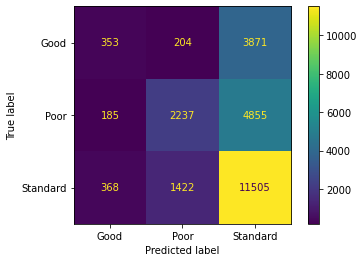

In [ ]:
param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10], 'max_iter':[5000]}
classifier = SVC()

clf_svc = GridSearchCV(classifier, param_grid)

clf_svc.fit(X_train,y_train)
print(clf_svc.best_params_)
y_pred_svc = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

In order to reduce the size we apply the PCA (Principal Component Analysis).

In [ ]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(clf_svc)

ValueError: ignored

In [ ]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10));

XGBOOST Classifier

In [ ]:
#size = 10
param_grid = {'max_depth':[8, 11, 15],
              #'lambda': np.random.uniform(1e-3,10,size).tolist(),
              #'alpha': np.random.uniform(1e-3,10,size).tolist(),
              #'colsample_bytree': np.random.uniform(0.3,1,size).tolist(),
              'learning_rate':[0.1, 0.001], #loguniform distribution
              #'min_child_weight':np.random.randint(1,300,size).tolist()
              }
cls = XGBClassifier()
clf = GridSearchCV(cls, param_grid)
#print(clf.best_params_)

clf_xgb = clf.fit(X_train,y_train)

print(clf_xgb.best_params_)
y_pred_xgb = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

In [ ]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(clf_xgb)

sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10))

KNN Classifier

In [ ]:
k_range = list(range(9, 15))

param_grid = {'n_neighbors':k_range, 'weights':['uniform', 'distance'], 'metric' : ['manhattan', 'l2', 'l1', 'euclidean', 'cosine']}
knn = neighbors.KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# fitting the model for grid search

grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_knn))

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

MLP Classifier

In [ ]:
cls_mlp = MLPClassifier( 
    hidden_layer_sizes=(5,5,4)    
    )

param_grid_mlp = {'activation':['identity', 'logistic', 'tanh', 'relu'], 'learning_rate_init':(0.001, 0.005, 0.01)}

classifier = GridSearchCV(cls_mlp, param_grid_mlp)
clf_mlp = classifier.fit(X_train,y_train)
print(clf_mlp.best_params_)
y_pred_mlp = clf_mlp.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)